In [17]:
from keras.models import load_model
from PIL import Image
import numpy as np
import os
from keras.applications.resnet50 import ResNet50, preprocess_input
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:

df = pd.read_csv('image_datasetq.csv')
def vec(example):
    return list(map(float,example[2:len(example)-2].split(',')))
df['vect'] = df['vect'].apply(vec)


In [6]:

# Преобразование списков векторов в массивы NumPy
X_vect = np.array(df['vect'].tolist())

# Применение PCA для сокращения размерности векторов до фиксированной длины
pca = PCA(n_components=100)  # Укажите желаемую размерность
X_vect_pca = pca.fit_transform(X_vect)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_vect_pca, df['font'], test_size=0.2, random_state=42)

# Инициализация и обучение модели случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9683333333333334


In [9]:
le = LabelEncoder()

df['font'] = le.fit_transform(df['font'])

In [175]:

list(le.inverse_transform([1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

['AlumniSansCollegiateOne-Italic',
 'AlumniSansCollegiateOne-Regular',
 'ArefRuqaaInk-Bold',
 'ArefRuqaaInk-Regular',
 'BrassMono-Bold',
 'BrassMono-BoldItalic',
 'BrassMono-Italic',
 'BrassMono-Regular',
 'GaneshaType-Regular',
 'GhastlyPanicCyr',
 'Realest-Extended',
 'TanaUncialSP',
 'ambidexter_regular',
 'better-vcr-5.2']

C:\Users\Solomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4411 - loss: 2.3157 - val_accuracy: 0.9421 - val_loss: 0.7635
Epoch 2/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8701 - loss: 0.8370 - val_accuracy: 0.9671 - val_loss: 0.4967
Epoch 3/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9325 - loss: 0.5740 - val_accuracy: 0.9737 - val_loss: 0.4076
Epoch 4/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9511 - loss: 0.4659 - val_accuracy: 0.9742 - val_loss: 0.3650
Epoch 5/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9654 - loss: 0.3905 - val_accuracy: 0.9771 - val_loss: 0.3238
Epoch 6/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9707 - loss: 0.3507 - val_accuracy: 0.9775 - val_loss: 0.3024
Epoch 7/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9707 - loss: 0.3198 - val_accuracy: 0.9767 - val_loss: 0.2846
Epoch 8/64
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9779 - loss: 0.2893 - val_accuracy: 0.9800 - v

Accuracy: 0.9833333492279053


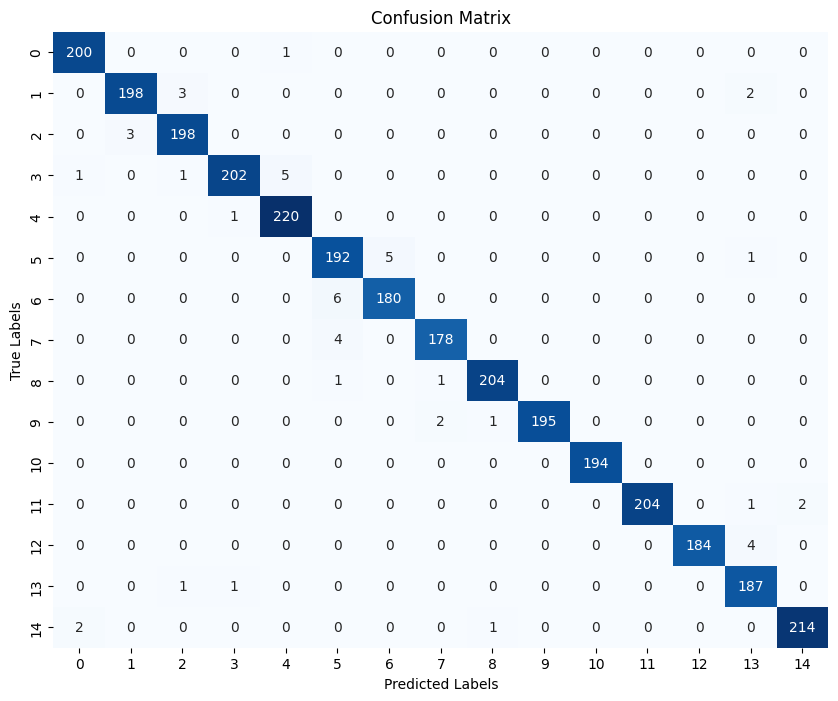

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       0.99      0.98      0.98       203
           2       0.98      0.99      0.98       201
           3       0.99      0.97      0.98       209
           4       0.97      1.00      0.98       221
           5       0.95      0.97      0.96       198
           6       0.97      0.97      0.97       186
           7       0.98      0.98      0.98       182
           8       0.99      0.99      0.99       206
           9       1.00      0.98      0.99       198
          10       1.00      1.00      1.00       194
          11       1.00      0.99      0.99       207
          12       1.00      0.98      0.99       188
          13       0.96      0.99      0.97       189
          14       0.99      0.99      0.99       217

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
we

In [18]:
X = np.array(df['vect'].tolist())
y = df['font']

# Преобразование целевой переменной в категориальные данные
y = pd.get_dummies(y)

# Получение названий переменных
category_names = y.columns
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация нейронной сети

# Инициализация нейронной сети
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(y.shape[1], activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Обучение модели с использованием Early Stopping и oversampled данными
history = model.fit(X_train, y_train, epochs=64, batch_size=258 ,validation_split=0.2, callbacks=[early_stopping])
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)
model.save('my_model.h5')
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", accuracy)

# Вычисление матрицы ошибок и метрик для оценки качества модели


# Вычисление матрицы ошибок и метрик
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
classification_rep = classification_report(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plot_path = os.path.join('plots', 'Confusion_Matrix.png')
plt.savefig(plot_path)

plt.show()

# Вывод отчета о классификации
print("Classification Report:\n", classification_rep)

In [194]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Создание DataFrame для логгирования
loss_df = pd.DataFrame({'Epoch': range(1, len(train_loss) + 1), 'Train Loss': train_loss, 'Validation Loss': val_loss})

# Сохранение логов в CSV файл
loss_df.to_csv('logs/loss_df.csv', index=False)


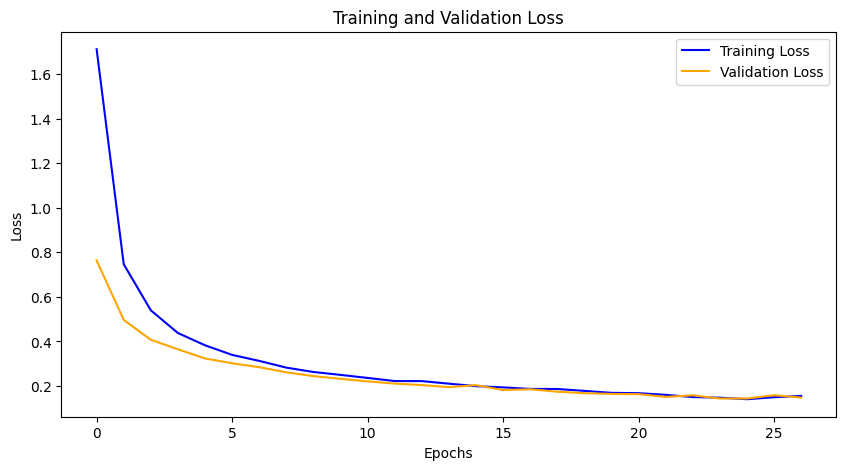

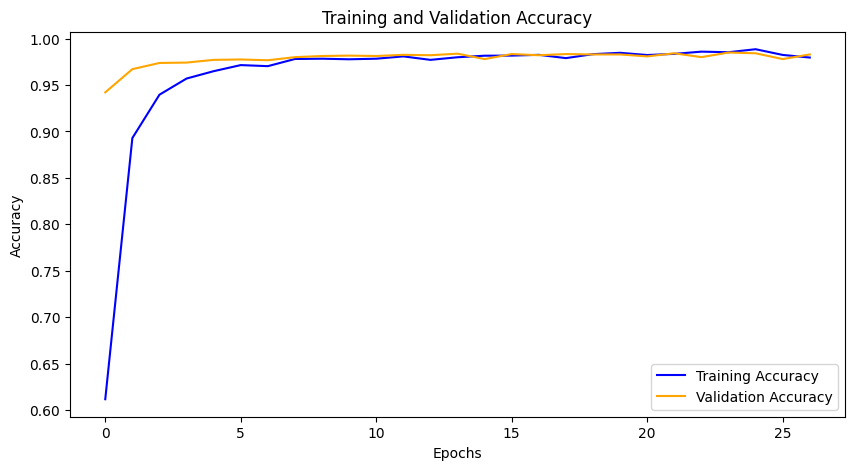

In [19]:

def plot_training_history(history):
    # Получаем значения функции потерь и точности на обучающем и валидационном наборах
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Строим график функции потерь
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plot_path = os.path.join('plots', 'Training_and_Validation_Loss.png')
    plt.savefig(plot_path)
    plt.show()
    
    # Строим график точности
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy, label='Training Accuracy', color='blue')
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plot_path = os.path.join('plots', 'Training_and_Validation_Accuracy.png')
    plt.savefig(plot_path)
    plt.show()

# Пример использования
plot_training_history(history)

In [197]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Вычисление метрик
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)

ROC AUC Score: 0.9999096722216473
F1 Score: 0.9822310027012431
Recall Score: 0.9822222222222222
Precision Score: 0.9824155183310858


In [20]:

label_encoder = LabelEncoder()
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Размер, ожидаемый ResNet50
    image = np.array(image)  # Преобразуем изображение в массив numpy
    image = preprocess_input(image)  # Предобработка изображения для ResNet50
    image = np.expand_dims(image, axis=0)  # Добавляем размерность пакета
    return image


features = resnet_model.predict(load_and_preprocess_image('test_new_img/GhastlyPanicCyr.jpg'))
predicted_class_probs = model.predict(features)
predicted_class_index = np.argmax(predicted_class_probs)

# Определение категории

print("Новое фото отнесен к категории:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Новое фото отнесен к категории: 10
